In [1]:
## import libraries

import numpy as np
import pandas as pd

# visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# scaling the data

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# PCA

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Hopkins statistics

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Silhouette score analysis

from sklearn.metrics import silhouette_score

# k-means clustering

from sklearn.cluster import KMeans

# Hierarchical clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


## 1) EDA

In [5]:
# read the csv and create dataframe

Help_df = pd.read_csv("../dataset/countrydata.csv")

In [6]:
# check data in df

Help_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# check nulls and data type of columns

Help_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [49]:
# null handling is not required as all the columns are non-null

In [5]:
# check the shape of the df

Help_df.shape

(167, 10)

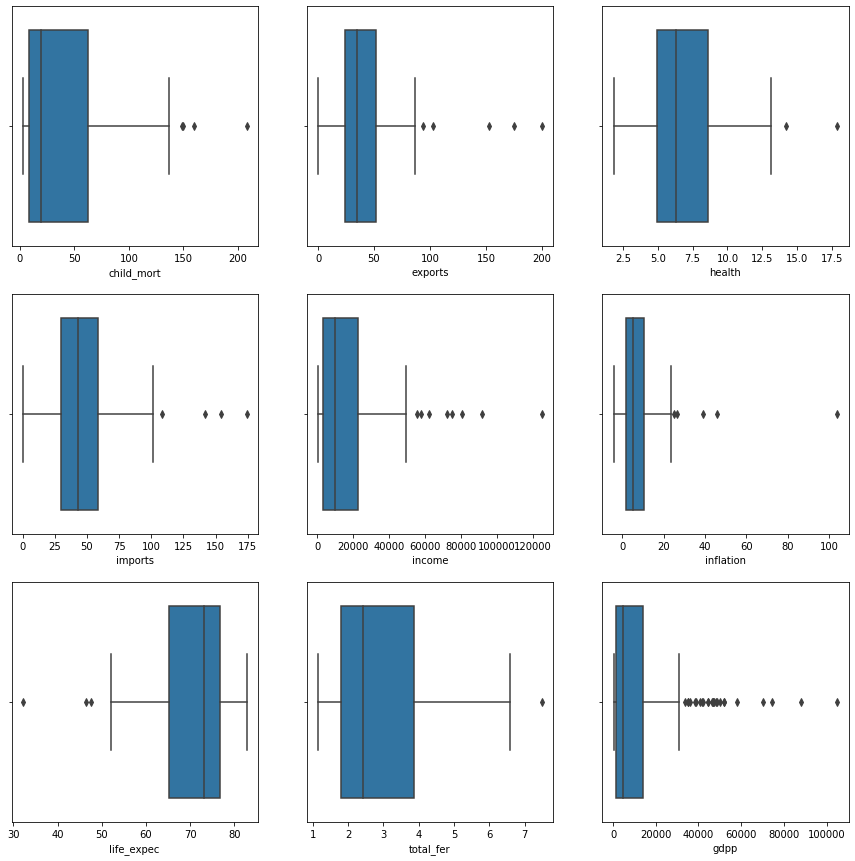

In [6]:
# check outliers in the df

Help_var = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=[15,15])

for i in enumerate(Help_var):
    
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1],data = Help_df)

In [50]:
#Opted to not handle outliers as the data set is small and country can be missed to get aid if removed at this stage,
#where caping cannot be considered as there are many outliers present in the data set.

# 2) Scaling

In [9]:
# Create df to temporary store the country column data

Country = Help_df['country']

In [10]:
# Create another df without country as it is an uniquely identified column for a record.

Help_df_p = Help_df.drop('country', axis=1)

In [11]:
# check the shape of the df

Help_df_p.shape

(167, 9)

In [12]:
# Scale the df

Scaler = StandardScaler()
Help_df_scaler = Scaler.fit_transform(Help_df_p)

In [13]:
# check variance of each column

100*(round(Help_df_p.var()/sum(Help_df_p.var()),4))

child_mort     0.00
exports        0.00
health         0.00
imports        0.00
income        52.52
inflation      0.00
life_expec     0.00
total_fer      0.00
gdpp          47.48
dtype: float64

In [14]:
# check the data

Help_df_p.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# 3) PCA

In [15]:
# Eigen Value Decomposition

pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(Help_df_scaler)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [16]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [17]:
#variance explained by first principal component

pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Text(0, 0.5, 'Cumulative Variance')

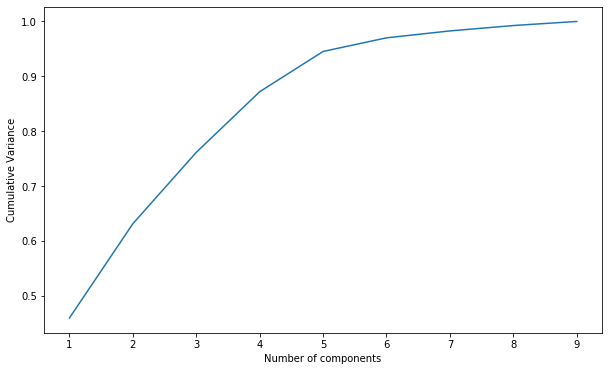

In [18]:
#plot scree plot to get significant components which explains variance majorly

plt.figure(figsize = (10,6))
plt.plot([1,2,3,4,5,6,7,8,9],np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')

In [19]:
# the number of PCs to be considered in this case will be 5 it is capturing more than 90% of variance

In [20]:
# dimensionality reduction

pca_final = IncrementalPCA(n_components = 5)
df_pca = pca_final.fit_transform(Help_df_scaler)

In [21]:
# Check the df shape

df_pca.shape

(167, 5)

In [22]:
# Create a dataframe with the PCs obtained

pc  = pd.DataFrame(df_pca)
pca_df2 = pd.DataFrame({'PC1': pc[0], 'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3], 'PC5':pc[4]}) 

In [23]:
# Check the resultant data

pca_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [24]:
#adding country back to the principal components

pca_df2 = pd.DataFrame({'country': list(Country), 'PC1': pc[0], 'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3], 'PC5':pc[4]})

In [25]:
# check the data

pca_df2.head()

,country,PC1,PC2,PC3,PC4,PC5
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186


# 3) Clustering 

In [26]:
# Hopkins statistics to know how well data can be clustered

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [27]:
#check the Hopkins measure

hopkins(pca_df2.drop('country', axis=1))

0.8223035606652226

In [28]:
# This shows that the data is good to perform clustering on it.

In [29]:
# drop the country column to perform cluastering

Help_df_clus = pca_df2.drop('country', axis = 1)

In [30]:
# check the df

Help_df_clus.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


### a) K- means Clustering

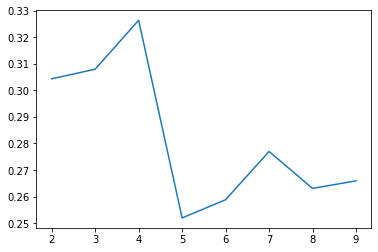

In [31]:
# Silhouette score analysis to get k

ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(Help_df_clus)
    ss.append([k, silhouette_score(Help_df_clus, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

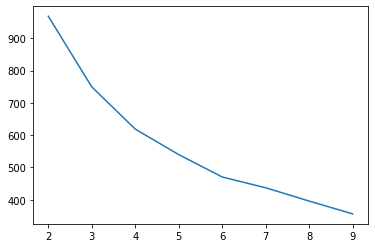

In [32]:
#elbow curve method

ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(Help_df_clus)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

In [33]:
# with the help of silhouette and ssd we can conclude to take k as 4

In [34]:
# perform K means using K=4

model_kmean = KMeans(n_clusters = 4, random_state = 50)
model_kmean.fit(Help_df_clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [35]:
# check the columns

pca_df2.columns

Index(['country', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5'], dtype='object')

In [36]:
# add the cluster Ids to the PCs data 

Help_km = pd.concat([pca_df2.reset_index().drop('index', axis = 1), pd.Series(model_kmean.labels_).reset_index().drop('index', axis  =1)], axis = 1)
Help_km.columns = ['country', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'ClusterID'] #
Help_km.head()

,country,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2


#### a.1) Analysis of k-means clustering result

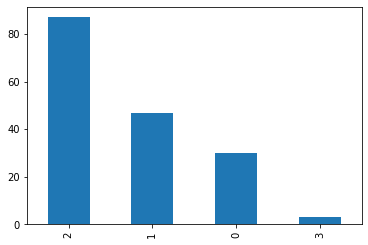

In [37]:
# Check the count of observation per cluster using bar graph

Help_km['ClusterID'].value_counts().plot(kind = 'bar')

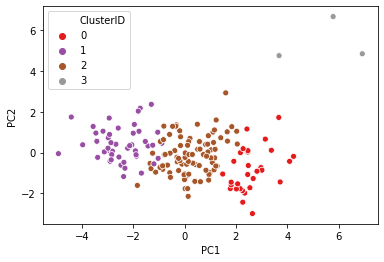

In [38]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'ClusterID', data = Help_km, palette='Set1')

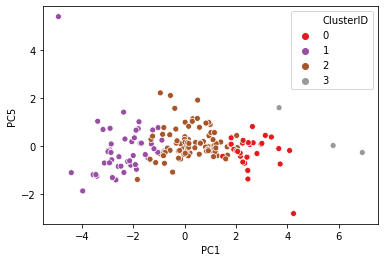

In [39]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'PC1', y = 'PC5', hue = 'ClusterID', data = Help_km, palette='Set1')

In [40]:
# merge the original data with the data(ClusterID)

Help_df_clusID = pd.merge(Help_df, Help_km[['country', 'ClusterID']], on = 'country')

In [41]:
Help_df_clusID.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [42]:
# Analysis of the clusters

In [43]:
# check mean of variables based on clusters created

Help_df_clusID.drop('country', axis =1).groupby('ClusterID').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,
0,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


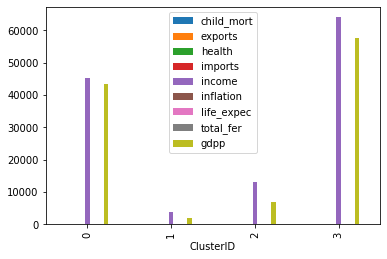

In [44]:
# shows the clusters with respect to other variables except income and gdpp

Help_df_clusID.drop('country', axis =1).groupby('ClusterID').mean().plot(kind = 'bar')

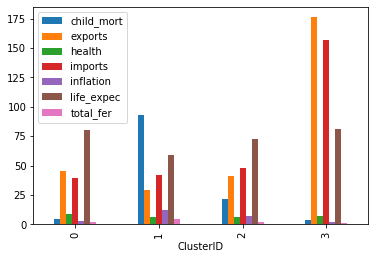

In [45]:
# shows the clusters with respect to other variables except income and gdpp

Help_df_clusID.drop(['country','income','gdpp'], axis =1).groupby('ClusterID').mean().plot(kind = 'bar')

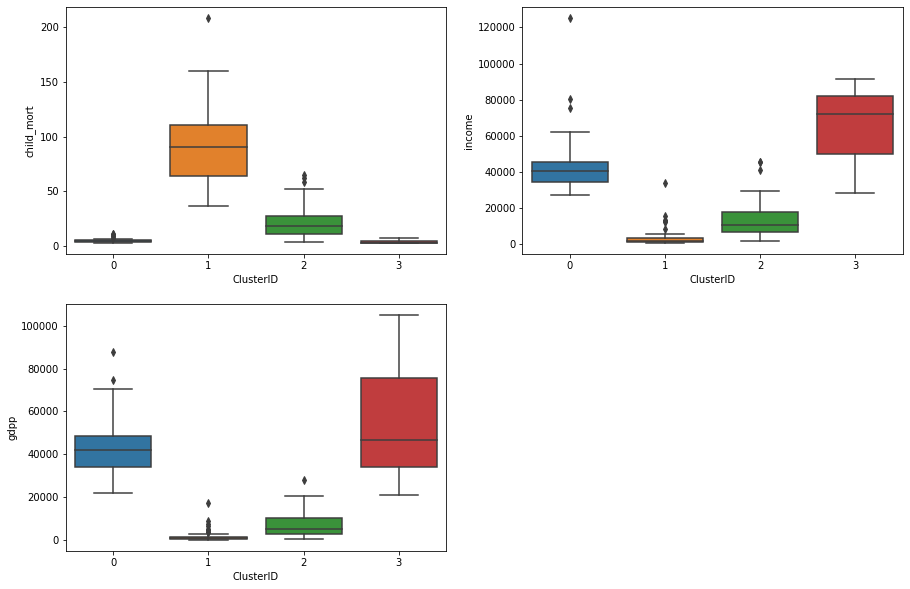

In [46]:
# Check outliers

plt.figure(figsize = (15,10))
var = ['child_mort','income','gdpp']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = Help_df_clusID)

In [47]:
# the list of counteries with high child mortality

Help_df_clusID[Help_df_clusID['ClusterID'] ==1][{'country','child_mort'}].sort_values(by = 'child_mort',ascending = False).head()

,country,child_mort
66,Haiti,208.0
132,Sierra Leone,160.0
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0


### b) Hirearchical Clustering

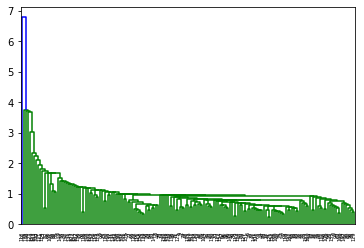

In [54]:
# single linkage

merging = linkage(Help_df_clus, method="single", metric='euclidean') 
dendrogram(merging)
plt.show()

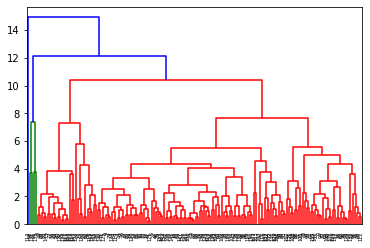

In [56]:
# complete linkage

merging = linkage(Help_df_clus, method="complete", metric='euclidean')
dendrogram(merging)
plt.show()

In [ ]:
# create 3 clusters based on k-mean result and problem statement understanding

In [78]:
# create clusters on single linkage 

cluster_labels = cut_tree(merging, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
# assign cluster labels and appending in the original df 

Help_df_clusID['cluster_labels'] = cluster_labels

In [80]:
# check the data

Help_df_clusID.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0


#### b.1) Analysis of hierarchical clustering result

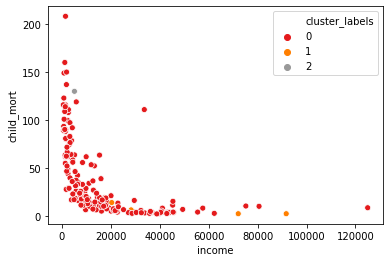

In [88]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_labels', data = Help_df_clusID, palette='Set1')

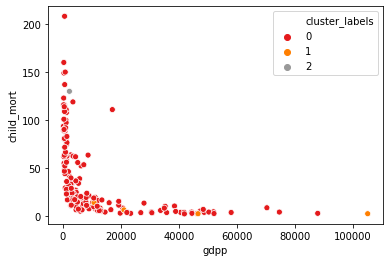

In [89]:
# Plot the Cluster with respect to the clusters obtained

sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_labels', data = Help_df_clusID, palette='Set1')

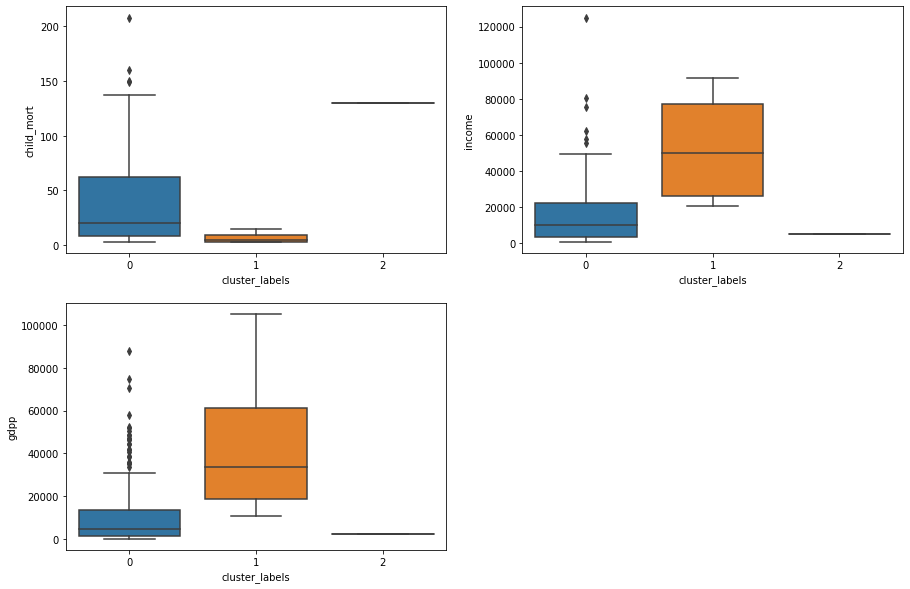

In [61]:
# Check outliers

plt.figure(figsize = (15,10))
var = ['child_mort','income','gdpp']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'cluster_labels', y = i[1], data = Help_df_clusID)

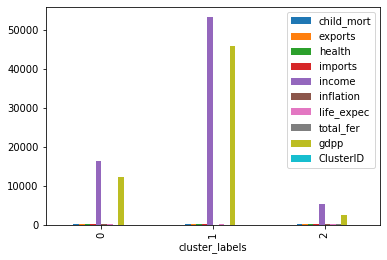

In [63]:
# shows the clusters with respect to income and gdpp mainly

Help_df_clusID.drop('country', axis =1).groupby('cluster_labels').mean().plot(kind = 'bar')

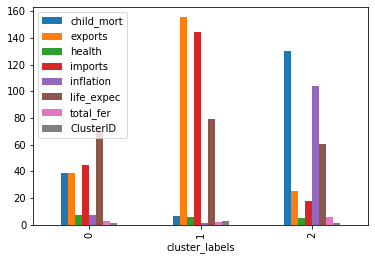

In [65]:
# shows the clusters with respect to other variables except income and gdpp

Help_df_clusID.drop(['country','income','gdpp'], axis =1).groupby('cluster_labels').mean().plot(kind = 'bar')

In [66]:
# the list of counteries with high child mortality

Help_df_clusID[Help_df_clusID['cluster_labels'] ==0][{'country','child_mort'}].sort_values(by = 'child_mort',ascending = False).head()

,country,child_mort
66,Haiti,208.0
132,Sierra Leone,160.0
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0


In [ ]:
# Reason to choose k-means
# Finding the observations that belong to certain cluster
# Mention the problem statement and the analysis approach.
# Explain the results of Principal Component Analysis and Clustering briefly.
# Include visualisations and summarise the most important results in the presentation.
# Make sure that you mention the final list of countries here (Don't just mention the cluster id or cluster name here. Mention the names of all the countries.
